In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
df = pd.read_csv('hotel_bookings.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
#show the total number of nulls for each feature
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
def impute_median(series):
    return series.fillna(series.median())

In [ ]:
#Fill children column with the median of the children
df.children = df['children'].transform(impute_median)

In [ ]:
# Remove rows with NaN in the 'country' column from the original DataFrame
df.dropna(subset=['country'], inplace=True)

# Reset the index after removing rows
df.reset_index(drop=True, inplace=True)

In [ ]:
df.isnull().sum()

# replace agent and company with have and dont have

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16006
company         

In [ ]:
df['agent_encoded'] = df['agent'].isnull().astype(int)

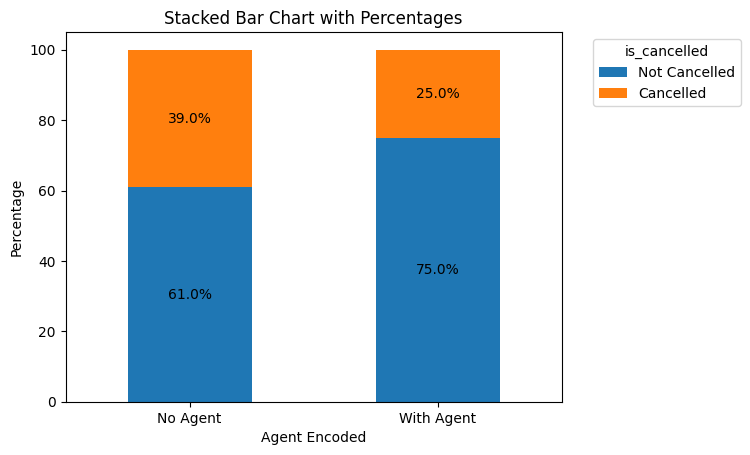

In [ ]:
grouped = df.groupby(['agent_encoded', 'is_canceled']).size().unstack(fill_value=0)

# Calculate percentages within each 'company_encoded' group
grouped_percentages = grouped.divide(grouped.sum(axis=1), axis=0) * 100

grouped_percentages.index = ['No Agent', 'With Agent']

# Create a stacked bar chart with percentages
ax = grouped_percentages.plot(kind='bar', stacked=True)
plt.xlabel('Agent Encoded')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart with Percentages')
plt.xticks(rotation=0)
plt.legend(title='is_cancelled', labels=['Not Cancelled', 'Cancelled'], bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate the bars with percentages
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.show()

In [ ]:
df['company_encoded'] = df['company'].isnull().astype(int)

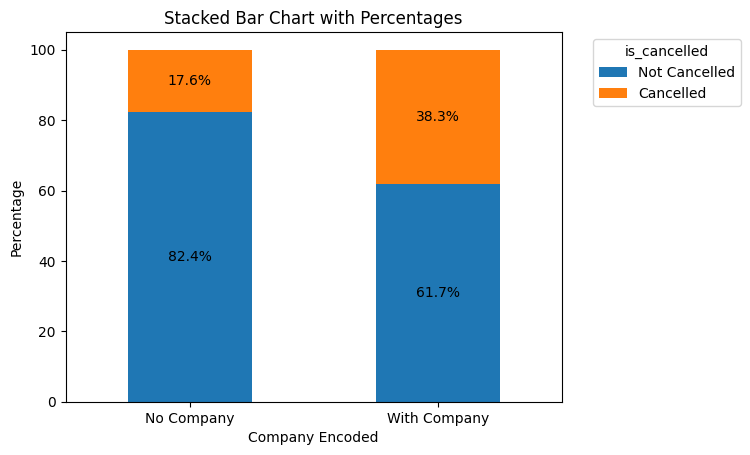

In [ ]:
grouped = df.groupby(['company_encoded', 'is_canceled']).size().unstack(fill_value=0)

# Calculate percentages within each 'company_encoded' group
grouped_percentages = grouped.divide(grouped.sum(axis=1), axis=0) * 100

grouped_percentages.index = ['No Company', 'With Company']

# Create a stacked bar chart with percentages
ax = grouped_percentages.plot(kind='bar', stacked=True)
plt.xlabel('Company Encoded')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart with Percentages')
plt.xticks(rotation=0)
plt.legend(title='is_cancelled', labels=['Not Cancelled', 'Cancelled'], bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate the bars with percentages
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.show()

In [ ]:
df.skew()

C:\Users\khali\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


is_canceled                        0.532434
lead_time                          1.344451
arrival_date_year                 -0.234314
arrival_date_week_number          -0.009956
arrival_date_day_of_month         -0.002477
stays_in_weekend_nights            1.298351
stays_in_week_nights               2.697650
adults                            18.458501
children                           4.105649
babies                            24.701893
is_repeated_guest                  5.317373
previous_cancellations            24.425685
previous_bookings_not_canceled    24.037152
booking_changes                    6.005437
agent                              1.092215
company                            0.599575
days_in_waiting_list              11.919584
adr                               10.598351
required_car_parking_spaces        4.195646
total_of_special_requests          1.346640
agent_encoded                      2.141089
company_encoded                   -3.874565
dtype: float64

In [ ]:
correlation_matrix = df.corr()
#correlation between is_canceled against other numeric attributes
is_cancelled_correlation = correlation_matrix['is_canceled']
sorted_correlations = is_cancelled_correlation.sort_values(ascending=False, key=abs)
sorted_correlations

is_canceled                       1.000000
lead_time                         0.291940
total_of_special_requests        -0.235595
required_car_parking_spaces      -0.194801
booking_changes                  -0.144669
previous_cancellations            0.109914
agent_encoded                    -0.099457
company_encoded                   0.098028
is_repeated_guest                -0.085185
agent                            -0.081954
adults                            0.058408
previous_bookings_not_canceled   -0.055495
days_in_waiting_list              0.054008
adr                               0.046133
babies                           -0.032523
company                          -0.024385
stays_in_week_nights              0.024103
arrival_date_year                 0.016339
arrival_date_week_number          0.007481
arrival_date_day_of_month        -0.006173
children                          0.004740
stays_in_weekend_nights          -0.002639
Name: is_canceled, dtype: float64

In [ ]:
from scipy.stats import chi2_contingency

# List of features (other than 'deposit_type') to test
feature_list = ['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'arrival_date_week_number', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'customer_type', 'deposit_type', 'reservation_status','company_encoded','agent_encoded']

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Feature', 'Chi-Squared Statistic', 'P-value'])

# Loop through the list of features and perform chi-squared tests
for feature in feature_list:
    contingency_table = pd.crosstab(df['is_canceled'], df[feature])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    results_df = results_df.append({'Feature': feature, 'Chi-Squared Statistic': chi2, 'P-value': p}, ignore_index=True)

# Display the results as a table (ascending)
print(results_df)

                      Feature  Chi-Squared Statistic        P-value
0           arrival_date_year              76.864320   2.037629e-17
1          arrival_date_month             562.212171  1.679657e-113
2   arrival_date_day_of_month             321.887339   1.245444e-50
3    arrival_date_week_number            1096.605323  1.514505e-195
4                        meal             304.270625   1.298819e-64
5                     country           15434.681533   0.000000e+00
6              market_segment            8394.485010   0.000000e+00
7        distribution_channel            3653.712427   0.000000e+00
8          reserved_room_type             637.147604  2.215793e-131
9          assigned_room_type            4841.145584   0.000000e+00
10              customer_type            2254.871846   0.000000e+00
11               deposit_type           27548.334078   0.000000e+00
12         reservation_status          118902.000000   0.000000e+00
13            company_encoded            1141.70

In [ ]:
df['arrival_date'] = df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str)

In [ ]:
df['arrival_date_w_year'] = df['arrival_date'].astype(str) + '-' + df['arrival_date_year'].astype(str)

In [ ]:
df['arrival_date_w_year'] = pd.to_datetime(df['arrival_date_w_year'], format='%B-%d-%Y')

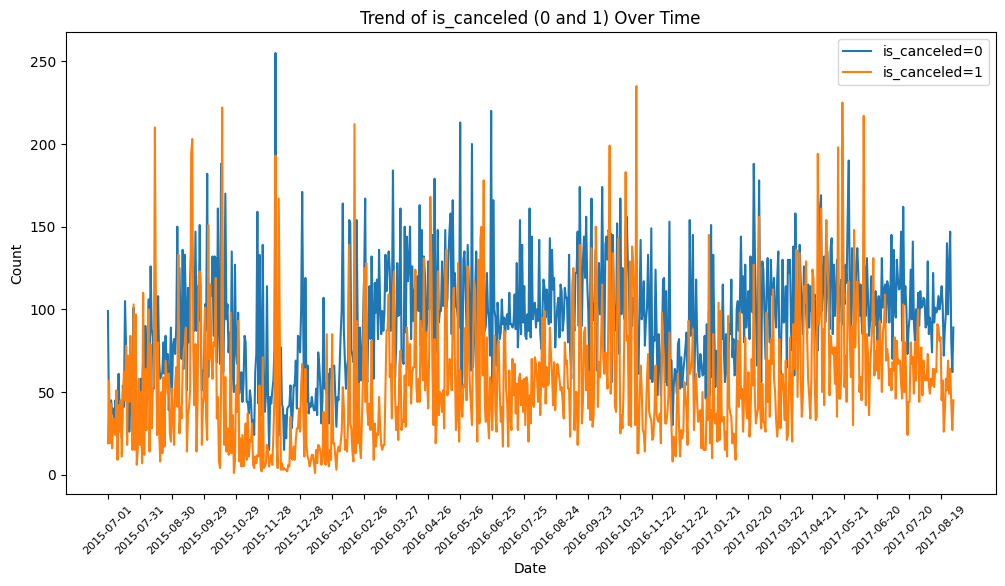

In [ ]:
date_cancel_counts = df.groupby(['arrival_date_w_year', 'is_canceled']).size().unstack(fill_value=0)

# Create a new column that calculates the total counts for each date
date_cancel_counts['total'] = date_cancel_counts.sum(axis=1)

# Plot the trendlines
plt.figure(figsize=(12, 6))
plt.plot(date_cancel_counts.index, date_cancel_counts[0], label='is_canceled=0', linestyle='-')
plt.plot(date_cancel_counts.index, date_cancel_counts[1], label='is_canceled=1', linestyle='-')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Trend of is_canceled (0 and 1) Over Time')

# Show only year/month as x-axis labels for readability
plt.xticks(date_cancel_counts.index[::30], rotation=45, fontsize=8)

# Add legend
plt.legend()

# Show the plot
plt.show()

#From this graph, we can observe a trend and see that generally, the number of cancelled booking is lower than the number of non-cancelled booking.
#However, we can also observe that for certain period of time, there is a sharp increase in cancelled booking, which makes the number of cancelled booking higher than the number of non-cancelled booking.

In [ ]:
dates_with_condition = []

# Iterate through the rows of date_cancel_counts
for index, row in date_cancel_counts.iterrows():
    # Check if the count for is_canceled=1 is higher than the count for is_canceled=0
    if row[1] > row[0]:
        dates_with_condition.append(index)

formatted_dates = [date.strftime('%Y-%m-%d') for date in dates_with_condition]

# Print the formatted dates
print("Dates where is_canceled=1 count is higher than is_canceled=0 count:")
print(formatted_dates)

Dates where is_canceled=1 count is higher than is_canceled=0 count:
['2015-07-02', '2015-07-09', '2015-07-13', '2015-07-16', '2015-07-18', '2015-07-20', '2015-07-21', '2015-07-22', '2015-07-25', '2015-07-27', '2015-07-30', '2015-08-03', '2015-08-13', '2015-08-14', '2015-08-27', '2015-08-30', '2015-09-05', '2015-09-10', '2015-09-17', '2015-09-18', '2015-09-24', '2015-09-26', '2015-10-03', '2015-10-05', '2015-10-16', '2015-10-17', '2015-10-24', '2015-11-13', '2015-12-08', '2015-12-09', '2016-01-22', '2016-01-27', '2016-02-17', '2016-02-21', '2016-02-26', '2016-02-28', '2016-03-25', '2016-04-14', '2016-04-19', '2016-04-24', '2016-04-28', '2016-05-13', '2016-05-24', '2016-06-07', '2016-06-08', '2016-06-09', '2016-06-12', '2016-06-14', '2016-06-15', '2016-06-17', '2016-07-07', '2016-09-07', '2016-09-08', '2016-09-09', '2016-09-24', '2016-09-30', '2016-10-01', '2016-10-13', '2016-10-15', '2016-10-21', '2016-10-22', '2016-10-27', '2016-10-28', '2016-11-01', '2016-11-03', '2016-11-04', '2016-1

## we consider those at p-value == 0
## top 7 are reservation status, country, deposit type, market segment, assigned_room_type, distribution_channel, customer type but we omit reservation status

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118902 entries, 0 to 118901
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118902 non-null  object        
 1   is_canceled                     118902 non-null  int64         
 2   lead_time                       118902 non-null  int64         
 3   arrival_date_year               118902 non-null  int64         
 4   arrival_date_month              118902 non-null  object        
 5   arrival_date_week_number        118902 non-null  int64         
 6   arrival_date_day_of_month       118902 non-null  int64         
 7   stays_in_weekend_nights         118902 non-null  int64         
 8   stays_in_week_nights            118902 non-null  int64         
 9   adults                          118902 non-null  int64         
 10  children                        118902 non-null  float64

In [ ]:
# Define the columns you want to select
columns_to_select = ['lead_time', 'country', 'deposit_type', 'market_segment', 'assigned_room_type', 'distribution_channel', 'customer_type', 'agent_encoded', 'company_encoded', 'arrival_date_week_number']

# Create the new DataFrame by selecting the desired columns
final_df = df[columns_to_select]


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118902 entries, 0 to 118901
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   lead_time                 118902 non-null  int64 
 1   country                   118902 non-null  object
 2   deposit_type              118902 non-null  object
 3   market_segment            118902 non-null  object
 4   assigned_room_type        118902 non-null  object
 5   distribution_channel      118902 non-null  object
 6   customer_type             118902 non-null  object
 7   agent_encoded             118902 non-null  int32 
 8   company_encoded           118902 non-null  int32 
 9   arrival_date_week_number  118902 non-null  int64 
dtypes: int32(2), int64(2), object(6)
memory usage: 8.2+ MB


In [ ]:
final_df

,lead_time,country,deposit_type,market_segment,assigned_room_type,distribution_channel,customer_type,agent_encoded,company_encoded,arrival_date_week_number
0,342,PRT,No Deposit,Direct,C,Direct,Transient,1,1,27
1,737,PRT,No Deposit,Direct,C,Direct,Transient,1,1,27
2,7,GBR,No Deposit,Direct,C,Direct,Transient,1,1,27
3,13,GBR,No Deposit,Corporate,A,Corporate,Transient,0,1,27
4,14,GBR,No Deposit,Online TA,A,TA/TO,Transient,0,1,27
...,...,...,...,...,...,...,...,...,...,...
118897,23,BEL,No Deposit,Offline TA/TO,A,TA/TO,Transient,0,1,35
118898,102,FRA,No Deposit,Online TA,E,TA/TO,Transient,0,1,35
118899,34,DEU,No Deposit,Online TA,D,TA/TO,Transient,0,1,35
118900,109,GBR,No Deposit,Online TA,A,TA/TO,Transient,0,1,35


In [ ]:
from sklearn.preprocessing import OneHotEncoder
# Perform one-hot encoding
transformed_df = final_df[['lead_time', 'agent_encoded', 'company_encoded']].copy()
transformed_df['arrival_date_week_number'] = df['arrival_date_week_number']
attributes_to_encode = ['country', 'deposit_type', 'market_segment', 'assigned_room_type', 'distribution_channel', 'customer_type']
for attribute in attributes_to_encode:
    onehot_encoder = OneHotEncoder(sparse=False)
    onehot_encoded = onehot_encoder.fit_transform(final_df[[attribute]])
    onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out([attribute]))

    # Concatenate the one-hot encoded features with the original dataframe
    transformed_df = pd.concat([transformed_df, onehot_encoded_df], axis=1)
    print(transformed_df.shape)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(transformed_df[['lead_time', 'arrival_date_week_number']])
transformed_df[['lead_time', 'arrival_date_week_number']] = scaled_data

(118902, 181)
(118902, 184)
(118902, 192)
(118902, 204)
(118902, 209)
(118902, 213)


# **Split data into Train-Test Sets**

In [ ]:
X = transformed_df
y = df['is_canceled']
print(X.shape, y.shape)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

(118902, 213) (118902,)


# **Models**

# **1. Logistic Regression**

1. Build Logistic Regression Model

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

C:\Users\khali\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

2. Make Predictions on Test set



In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

3. Evaluate the Model

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.7700685421134519
Confusion Matrix:
[[13462  1400]
 [ 4068  4851]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83     14862
           1       0.78      0.54      0.64      8919

    accuracy                           0.77     23781
   macro avg       0.77      0.72      0.74     23781
weighted avg       0.77      0.77      0.76     23781



Another way of evaluation

In [ ]:
# or
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7700685421134519
Precision: 0.7760358342665173
Recall: 0.5438950554994955
F1 Score: 0.6395517468688201


Retrieving the coefficients and intercept for interpretability

In [ ]:
# Get the coefficients and intercept
coefficients = model.coef_[0]
intercept = model.intercept_[0]

print("Coefficients:")
for i, coef in enumerate(coefficients):
    print(f"    {X.columns[i]}: {coef}")

print(f"Intercept: {intercept}")

Coefficients:
    lead_time: 0.6281433308238505
    agent_encoded: -0.3898518280891622
    company_encoded: 0.9640253967466361
    arrival_date_week_number: -0.025932149412849808
    country_ABW: -0.195593153391545
    country_AGO: 1.7971279405138776
    country_AIA: -0.06061944068135932
    country_ALB: -0.15067070599091445
    country_AND: 0.6108454762862343
    country_ARE: 2.3627517484341025
    country_ARG: -0.4296699920437932
    country_ARM: 0.014914482394615805
    country_ASM: 0.0
    country_ATA: -0.10154336294646465
    country_ATF: -0.11318304916858199
    country_AUS: -0.6857257709866889
    country_AUT: -0.8698553296725404
    country_AZE: 0.5130780060727115
    country_BDI: -0.01478267869651869
    country_BEL: -0.8307397296275624
    country_BEN: 0.2663774587472466
    country_BFA: -0.07933383203897429
    country_BGD: 0.7884700795138332
    country_BGR: -1.211958122453904
    country_BHR: 0.28971427974827396
    country_BHS: -0.024890081764090285
    country_BIH: 0.036

Performed preliminary regularization on the model to see if it performs better, but it did not.

In [ ]:
# Initialize the logistic regression model with L2 regularization (Ridge)
# You can adjust the value of C to control the strength of regularization
model_regularized = LogisticRegression(penalty='l2', C=0.8)

# Train the regularized model
model_regularized.fit(X_train, y_train)

# Make predictions on the test set
y_pred_regularized = model_regularized.predict(X_test)

# Evaluate the regularized model
accuracy_regularized = accuracy_score(y_test, y_pred_regularized)
conf_matrix_regularized = confusion_matrix(y_test, y_pred_regularized)
classification_rep_regularized = classification_report(y_test, y_pred_regularized)

print("Regularized Logistic Regression:")
print(f"Accuracy: {accuracy_regularized}")
print(f"Confusion Matrix:\n{conf_matrix_regularized}")
print(f"Classification Report:\n{classification_rep_regularized}")

# Get the coefficients and intercept of the regularized model
coefficients_regularized = model_regularized.coef_[0]
intercept_regularized = model_regularized.intercept_[0]

print("Coefficients (Regularized Model):")
for i, coef in enumerate(coefficients_regularized):
    print(f"    {X.columns[i]}: {coef}")

print(f"Intercept (Regularized Model): {intercept_regularized}")

Regularized Logistic Regression:
Accuracy: 0.7697741894789958
Confusion Matrix:
[[13457  1405]
 [ 4070  4849]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83     14862
           1       0.78      0.54      0.64      8919

    accuracy                           0.77     23781
   macro avg       0.77      0.72      0.74     23781
weighted avg       0.77      0.77      0.76     23781

Coefficients (Regularized Model):
    lead_time: 0.6290588760621624
    agent_encoded: -0.3872252840393556
    company_encoded: 0.9645814263707867
    arrival_date_week_number: -0.025337700286398458
    country_ABW: -0.19611469630195616
    country_AGO: 1.685862013685272
    country_AIA: -0.06073150896292735
    country_ALB: -0.15103196784454256
    country_AND: 0.6142253641095954
    country_ARE: 2.389423749125744
    country_ARG: -0.45544874998738755
    country_ARM: 0.015400874041850867
    country_ASM: 0.0
    country_ATA: -0.101

C:\Users\khali\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Hyperparameter Tuning to find the regularization that will yield the best results, then evaluating the new model post hyperparameters tuning. In this case, it did perform better.

In [ ]:
# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


# Initialize the logistic regression model
logreg = LogisticRegression()

# Define a distribution of values for the 'C' parameter (regularization strength)
param_dist = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(logreg, param_distributions=param_dist, n_iter=20, cv=10, scoring='precision', random_state=0)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Get the best model from the random search
best_model = random_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
precision_best = precision_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
classification_rep_best = classification_report(y_test, y_pred_best)

print("Best Logistic Regression Model based on Precision:")
print(f"Precision: {precision_best}")
print(f"Confusion Matrix:\n{conf_matrix_best}")
print(f"Classification Report:\n{classification_rep_best}")


C:\Users\khali\anaconda\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 7 is smaller than n_iter=20. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
C:\Users\khali\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\khali\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scal

C:\Users\khali\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\khali\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\khali\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\khali\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\khali\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\khali\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

Best Hyperparameters: {'C': 0.001}
Best Logistic Regression Model based on Precision:
Precision: 0.8111375709836967
Confusion Matrix:
[[13831  1031]
 [ 4491  4428]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.93      0.83     14862
           1       0.81      0.50      0.62      8919

    accuracy                           0.77     23781
   macro avg       0.78      0.71      0.72     23781
weighted avg       0.78      0.77      0.75     23781

